# An Introduction to Unsupervised Clustering

Unsupervised clustering is a machine learning technique that groups similar, unlabeled data points into clusters based on inherent patterns. It is used for tasks like market segmentation, anomaly detection, and data compression without prior knowledge of the data's categories.

There are several unsupervised clustering models-check out the [sci-kit learn documentation](https://scikit-learn.org/stable/modules/clustering.html) for a more robust deep dive into the various clustering algorithms in the sklearn.cluster module. We will cover a couple clustering algorithms, but they represent a great foundation to go ahead and understand even the  more advanced methods such as DBSCAN or HDBSCAN.

### Unsupervised Clustering Techniques

#### 1. K-Means Clustering

Hands down the simpliest clustering algorithim, K-means works by grouping/assigning similar points to clusters without labelled data. K-means is known as a hard clustering technique, because each data point can only belong to nearest cluster.The intuition is pretty simple:

1. The algorithim randomly initializes k-cluster centres (centroids)

2. Calculate Euclidian distances of each point to the cluster centre

3. Assign data points to a cluster

4. Update the cluster centres with the mean of assigned data points.

5. Repeat step 3 and 4 until model convergence 

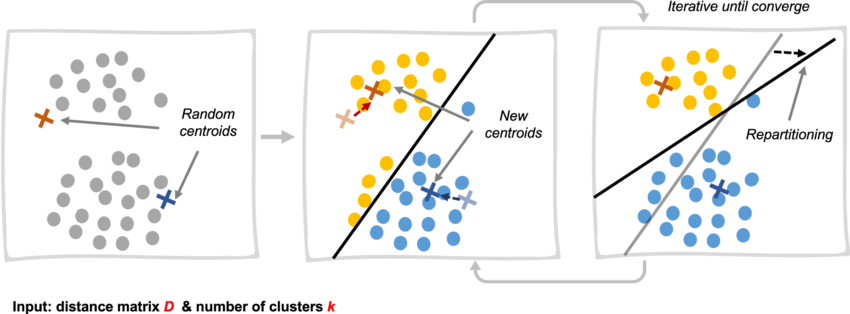

K-means clustering is simple and easy to interpret but is suffers from some major limitations:
1. Computationally expensive and slow- this is because all the data points influence the location of the new cluster centres, meaning for each iteration,computation span the entire dataset.
2. Inaccurate convergence- convergence depends on the initial random initialization.
3. K-means is very sensitive to outliers
4. K-means does not perform well on complex datasets-with complicated over-lapping cluster shapes.

#### 2. Gaussian Mixture Models

A Gaussian Mixture Model (GMM) is a probabilistic model that assumes data points are generated from a mixture of several Gaussian (normal) distributions with unknown parameters. Unlike hard clustering methods such as K-Means which assign each point to a single cluster based on the closest centroid, GMM performs soft clustering by assigning each point a probability of belonging to multiple clusters.

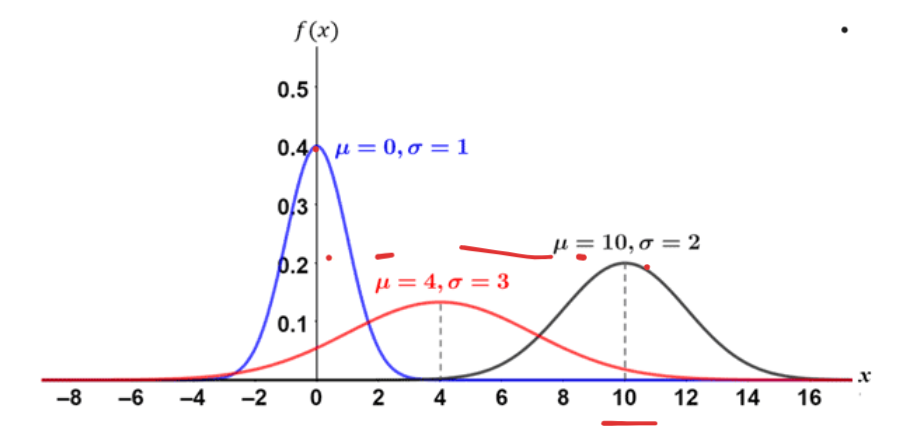

We have understood, that GMM assumes that our dataset was generated by an aggregation of several normal distributions. GMM aims to estimate these normal distributions (gaussian components) that best describe the data. Mathematically, it tries to find the 'building blocks' of a gaussian, which are the mean and the covariance of the gaussian components. The image above, is to illustrate what I mean by building blocks, if I wanted to plot a normal distribution, all I would need is the mean (height) and the variance (the width).

A more descriptive breakdown should be found in the class recordings.

#### Steps in GMM

**1. InitializationGuess the parameters**

Start by randomly guessing initial values for the mean, covariance, and mixing weight for every component cluster (k). You can also use the results from a K-Means run for a better starting guess.

**2. Calculate Responsibilities**

For every single data point, calculate the probability that it belongs to each of the k component clusters, using the current (guessed) parameters. This is like asking, "Given where the cluster centers currently are, how strongly does this point belong to Cluster 1 vs. Cluster 2 vs. Cluster 3?

**3. Update Parameters**

 Use the responsibilities calculated above to re-calculate or update the parameters (mean,covariance,weights) for every component cluster. Such that,the data points that have a high responsibility for a cluster influence that cluster's new parameters more than points with low responsibility. The result is that we move the center and reshaping each cluster so it better fits the points that currently have the highest probability of belonging to it.

**4. Repeat the above 2 steps until convergence**

That is until the parameters stop changing significantly between iterations, or until a maximum number of iterations is reached.

#### 3. Kernel Density Estimation